# Connecting To Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'      'Internship-Aug2020-Gowtham R.pdf'   Photos
'Getting started.pdf'  'My Drive'			   'Pongal 2021'


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project

/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project


# Imports


In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np 
from os.path import join
from myFunctions.candle_stick_plot import plotCandleStick
from myFunctions.list_data_dir import load_data_files
from myFunctions import dataConversion 
from myFunctions.predictionPlot import prediction_plot
from myFunctions.twitter import get_tweets

# Global Variables

In [ ]:
fields = ['Date','High','Low','Open','Close']
lookback = 30
datafolder = r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50_CurrentData"
prediction_date = pd.Timestamp(2021,5,16,00,00,00)

In [ ]:
data_files = load_data_files(datafolder)

In [ ]:
companyname = "HCLTECH"
filename = companyname + ".NS.csv"
datafile= join(datafolder,filename) 

# Load Models


In [ ]:
high_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_model')


In [ ]:
open_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/open_model')

In [ ]:
close_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/close_model')

In [ ]:
low_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/new_low_model')

In [ ]:
high_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_148 (Dense)            (None, 50)                25050     
_________________________________________________________________
dense_149 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_150 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_151 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 51        
Total params: 48,251
Trainable params: 48,251
Non-trainable params: 0
_________________________________________________

In [ ]:
low_model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_229 (Dense)            (None, 250)               125250    
_________________________________________________________________
dense_230 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_231 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_232 (Dense)            (None, 250)               62750     
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 251       
Total params: 329,251
Trainable params: 329,251
Non-trainable params: 0
_______________________________________________

In [ ]:
open_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_139 (Dense)            (None, 200)               100200    
_________________________________________________________________
dense_140 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 201       
Total params: 156,101
Trainable params: 156,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
close_model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_142 (Dense)            (None, 200)               100200    
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 201       
Total params: 115,901
Trainable params: 115,901
Non-trainable params: 0
_________________________________________________________________


# Load Data

In [ ]:
df = pd.read_csv(datafile,usecols = fields)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close
0,2021-02-15,970.0,971.250000,950.099976,954.650024
1,2021-02-16,957.0,962.250000,944.099976,952.299988
2,2021-02-17,952.0,958.400024,941.000000,943.200012
3,2021-02-18,944.0,956.750000,938.349976,948.099976
4,2021-02-19,950.0,958.000000,944.450012,950.150024


In [ ]:
plotCandleStick(df,companyname)

In [ ]:
High_X , High_y = dataConversion.convert2matrix(df['High'],lookback)
Low_X,Low_y = dataConversion.convert2matrix(df['Low'],lookback)
Open_X,Open_y = dataConversion.convert2matrix(df['Open'],lookback)
Close_X,Close_y = dataConversion.convert2matrix(df['Close'],lookback)


# Prediction Plots


In [ ]:
def input_next_day(df,col='High'):
    arr = np.array(df[col])
    return arr[-1*lookback:]
    
    
    

In [ ]:
print(input_next_day(df,'Low'))

[ 964.450012  978.650024  990.599976 1002.599976 1020.25     1024.699951
 1031.650024 1034.150024 1001.200012  972.200012  958.75      994.5
  987.849976  957.        955.299988  950.200012  923.049988  923.400024
  921.75      907.099976  895.400024  891.        899.25      900.599976
  901.25      913.700012  910.200012  905.099976  895.        896.5     ]


In [ ]:
df["Low"].tail()

54    913.700012
55    910.200012
56    905.099976
57    895.000000
58    896.500000
Name: Low, dtype: float64

In [ ]:
high_predict_input = input_next_day(df,'High')
low_predict_input = input_next_day(df,'Low')
open_predict_input = input_next_day(df,'Open')
close_predict_input = input_next_day(df,'Close')

In [ ]:
predicted_high_stock_value = high_model.predict(high_predict_input.reshape(-1,lookback))[0][0]
predicted_low_stock_value = low_model.predict(low_predict_input.reshape(-1,lookback))[0][0]

In [ ]:
predicted_open_stock_value = open_model.predict(open_predict_input.reshape(-1,lookback))[0][0]
predicted_close_stock_value = close_model.predict(close_predict_input.reshape(-1,lookback))[0][0]

In [ ]:
predicted_high_stock_value

887.48846

In [ ]:
predicted_low_stock_value

919.45184

In [ ]:
predicted_open_stock_value

924.4507

In [ ]:
predicted_close_stock_value

907.6012

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def predicted_plot(df,lookback,prediction_input,predicted_value):
    plt.plot(df['Date'][-1*lookback:],prediction_input)
    plt.plot(prediction_date,predicted_value,marker="*")
    plt.show()

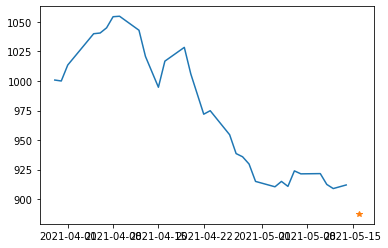

In [ ]:
predicted_plot(high_predict_input,predicted_high_stock_value)

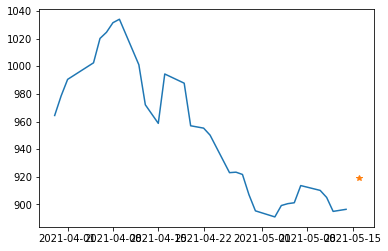

In [ ]:
predicted_plot(low_predict_input,predicted_low_stock_value)

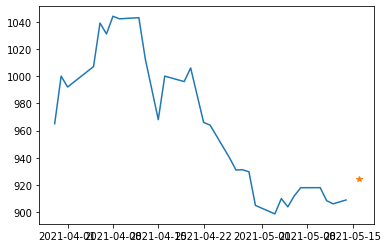

In [ ]:
predicted_plot(open_predict_input,predicted_open_stock_value)

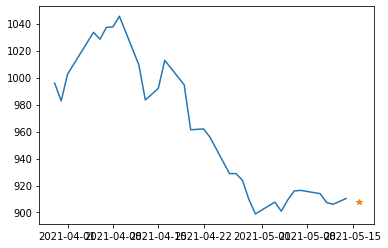

In [ ]:
predicted_plot(close_predict_input,predicted_close_stock_value)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
high_predict = high_model.predict(High_X)

In [ ]:
high_model_score = r2_score(High_y ,high_predict)

In [ ]:
high_model_score

0.7670574446939445

In [ ]:
low_predict = low_model.predict(Low_X)
low_model_score  = r2_score(Low_y,low_predict)
low_model_score

0.5968746030809924

In [ ]:
open_predict = open_model.predict(Open_X)
open_model_score = r2_score(Open_y,open_predict)
open_model_score

0.718464118650987

In [ ]:
close_predict = close_model.predict(Close_X)
close_model_score = r2_score(Close_y,close_predict)
close_model_score

0.8591271100921711

In [ ]:
pred_df = df[-30:]

In [ ]:
pred_df.tail()

,Date,Open,High,Low,Close
54,2021-05-07,918.000000,921.400024,913.700012,916.400024
55,2021-05-10,918.049988,921.599976,910.200012,913.950012
56,2021-05-11,908.500000,912.450012,905.099976,907.299988
57,2021-05-12,906.150024,908.950012,895.000000,906.099976
58,2021-05-14,909.000000,912.000000,896.500000,910.349976


In [ ]:
df.tail()

,Date,Open,High,Low,Close
54,2021-05-07,918.000000,921.400024,913.700012,916.400024
55,2021-05-10,918.049988,921.599976,910.200012,913.950012
56,2021-05-11,908.500000,912.450012,905.099976,907.299988
57,2021-05-12,906.150024,908.950012,895.000000,906.099976
58,2021-05-14,909.000000,912.000000,896.500000,910.349976


In [ ]:
pred_df.loc[pred_df.index[-1]+1] = [prediction_date,predicted_open_stock_value,predicted_high_stock_value,predicted_low_stock_value,predicted_close_stock_value]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pred_df.tail()

,Date,Open,High,Low,Close
55,2021-05-10,918.049988,921.599976,910.200012,913.950012
56,2021-05-11,908.500000,912.450012,905.099976,907.299988
57,2021-05-12,906.150024,908.950012,895.000000,906.099976
58,2021-05-14,909.000000,912.000000,896.500000,910.349976
59,2021-05-16,924.450684,887.488464,919.451843,907.601196


In [ ]:
plotCandleStick(pred_df,"Prediction of HCL")

# Twitter


In [ ]:
tweet_list = get_tweets("#hcltech","HCLTECH")

In [ ]:
tweet_list[0]

[1,
 'krishnakhanna',
 '#ICMCBO Alert Sell #HCLTECH CMP: 932.15 Target: 0 SL: 0 #NimblrTA, These alerts are delayed and for demonstration.… https://t.co/6eDmx0Rr3O',
 datetime.datetime(2021, 5, 18, 8, 3, 50),
 0]

In [ ]:
tweet_df = pd.DataFrame(tweet_list,columns=['tweet_ID','Name','Text',"Date","Media"])
tweet_df['Date'] = pd.to_datetime(tweet_df['Date'])
tweet_df.head()
tweet_df.set_index('tweet_ID')

,Name,Text,Date,Media
tweet_ID,,,,
1,krishnakhanna,#ICMCBO Alert Sell #HCLTECH CMP: 932.15 Target...,2021-05-18 08:03:50,0
2,vh1ne,935 still a golden opportunity for long term i...,2021-05-18 07:08:03,0
3,DeliverHcl,#India's software service exporters have done ...,2021-05-18 06:47:21,0
4,itsvdudhe26,#hcltech (HclTech)\nBuy at cmp 935\nSL below 8...,2021-05-18 06:44:08,0
5,krishnblue,#PSUBANKS and\n\n#HCLTECH\n\nBoth doing very w...,2021-05-18 06:39:09,0
6,krishnakhanna,#ICMCBO Alert Buy #HCLTECH CMP: 938.95 Target:...,2021-05-18 06:37:09,0
7,Xxcept1on,"As i explained in my stock analysis video, #hc...",2021-05-18 06:25:14,0
8,HCLFirstCareers,Only those with knowledge of IT can crack this...,2021-05-18 06:12:42,0
9,Prakashagwani,#HCLTECH @ 935\n#EICHERMOT @ 2530\n#NTPC @ 114...,2021-05-18 05:32:01,0


In [ ]:
tweet_df.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/twitter_data.csv",index=False)